# 3.4 영화 리뷰 분류 : 이진 분류 예제

### 3.4.1 IMDB 데이터셋

- 인터넷 영화 데이터 베이스(Internet Movie Database)
- 5만개의 리뷰 데이터 셋
- training data : 25000
- test data : 25000
- 긍정 50%, 부정 50%

In [1]:
from keras.datasets import imdb

# IMDB 데이터셋 로드
# num_words=10000은 자주 사용하는 단어 1만개만 사용한다는 의미
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000) 

print(train_data.shape, train_labels.shape)
print(test_data.shape, test_labels.shape)

Using TensorFlow backend.


(25000,) (25000,)
(25000,) (25000,)


In [2]:
# 어떤 데이터 있는지 까보기
word_index = imdb.get_word_index()

# word가 key, index가 value로 돼있어서 그거 뒤집는 코드
index_word = [(index, word) for (word, index) in word_index.items()]
index_word = dict(index_word)

# 출력해보기
decoded_data = ' '
for i in train_data[0]:
    decoded_data += (index_word.get(i-3, '?')+' ')
    
print(decoded_data)

 ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## 3.4.2 데이터 준비

신경망에 숫자 리스트를 주입할 수는 없으므로 리스트를 텐서로 바꾸어주어야 함
- list를 tensor로 바꾸는 두가지 방법
    1. Embedding layer
        - list에 padding을 추가해 같은 길이가 되도록하고, (samples, sequence_length)크기의 정수 텐서로 변환
        - 이 텐서를 다룰 수 있는 층(Embedding layer)를 첫번째 층으로 사용
        
    2. Dense layer
        - list를 one-hot encoding
        - 이 텐서를 다룰 수 있는 층(Dense layer)를 첫번째 레이어로 사용

여기서는 2의 방법을 사용해봄        

In [3]:
# 정수 sequence를 one-hot encoding

import numpy as np

def vectorize_sequences(sequences, dim=10000):
    result = np.zeros((len(sequences), dim))
    
    for i, sequence in enumerate(sequences):
        result[i, sequence] = 1.
        
    return result


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

print(x_train.shape, x_test.shape)

(25000, 10000) (25000, 10000)


In [4]:
y_train = np.array(train_labels, dtype=np.float32)
y_test = np.array(test_labels, dtype=np.float32)

print(y_train.shape, y_test.shape)

(25000,) (25000,)


## 3.4.3 신경망 모델 만들기

- input data는 벡터, label은 스칼라(1 또는 0)와 같은 문제에는 relu 활성화 함수를 사용한 Fully connected layer를 쌓은 network가 잘 동작함
- Dense() : Fully Connected Layer
    - Dense(16)의 경우,
    - Dense layer에 전달한 매개변수(16)는 은닉 유닛(hidden unit)의 개수(출력의 수)
    - 16개의 은닉 유닛이 있다는 것은 가중치 행렬 Weight의 크기가 (input_dimension, 16)라는 뜻
    - 입력 데이터와 W를 점곱하면 입력 데이터가 16차원으로 표현된 공간으로 투영됨
    - 표현 공간의 차원이란 신경망이 내재된 표현을 학습할 때 가질 수 있는 자유도를 뜻함
    - 따라서, 은닉 유닛을 늘리면 신경망이 더 복잡한 표현을 학습할 수 있지만 계산비용이 커지고 원하지 않는 패턴까지 학습할 수 있음(훈련데이터에 더 학습되는 overfitting)

(Dense layer의 동작은 아래 코드 참고)

In [5]:
# 아래 네트워크의 경우 Dense Layer에서 일어나는 과정들
# network = models.Sequential()
# network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
# network.add(layers.Dense(10, activation='softmax'))

# batch_size는 100이라고 가정
batch_size = 100

# 1. network.add(layers.Dense(512, activation='relu', input_shape=(28*28,))
print("1. network.add(layers.Dense(512, activation='relu', input_shape=(28*28,))")

# 1-1. input array(batch)
input_array = np.random.rand(batch_size, 28*28)
print("input  of 1st layer =", input_array.shape) # (batch_size, 784)

# 1-2. Weight의 shape는 output_layer_1.shape[1]의 값인 784와
#      Dense()에 매개변수로 전달된 output의 크기(512)에 맞춰서 생성됨
#      W.shape = (784, 512)
W_1 = np.random.rand(input_array.shape[1], 512)
print("Weight of 1st layer =", W_1.shape)

# 1-3. input_array와 W_1간의 dot product 및 bias addition
#      bias는 Dense()에 매개변수로 전달된 output의 크기(512)에 맞춰서 생성됨
b_1 = np.random.rand(512)
print("bias   of 1st layer =", b_1.shape)
output_layer_1 = np.dot(input_array, W_1) + b_1
print("output of 1st layer = (100, 784) dot (784, 512) + (512) =", output_layer_1.shape)
print("parameter = W(784*512) + b(512) = 401920")
print("")

# 2. network.add(layers.Dense(10, activation='softmax'))
print("2. network.add(layers.Dense(10, activation='softmax'))")

# 2-1. input array(output_layer_1)
print("input  of 2nd layer =", output_layer_1.shape) # (batch_size, 784)

# 2-2. Weight의 shape는 output_layer_1.shape[1]의 값인 512와
#      Dense()에 매개변수로 전달된 output의 크기(10)에 맞춰서 생성됨
#      W.shape = (512, 10)
W_2 = np.random.rand(output_layer_1.shape[1], 10)
print("Weight of 2nd layer =", W_2.shape)

# 2-3. input_array와 W_2간의 dot product 및 bias addition
#      bias는 Dense()에 매개변수로 전달된 output의 크기(10)에 맞춰서 생성됨
b_2 = np.random.rand(10)
print("bias   of 1st layer =", b_2.shape)
output_layer_2 = np.dot(output_layer_1, W_2)
print("output of 2nd layer = (100, 512) dot (512, 10) + (10) =", output_layer_2.shape)
print("parameter = W(512*10) + b(10) = 5130")

print("")
print("---------------------------- summary()와의 비교 ----------------------------")
print("")


from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))
network.summary()

1. network.add(layers.Dense(512, activation='relu', input_shape=(28*28,))
input  of 1st layer = (100, 784)
Weight of 1st layer = (784, 512)
bias   of 1st layer = (512,)
output of 1st layer = (100, 784) dot (784, 512) + (512) = (100, 512)
parameter = W(784*512) + b(512) = 401920

2. network.add(layers.Dense(10, activation='softmax'))
input  of 2nd layer = (100, 512)
Weight of 2nd layer = (512, 10)
bias   of 1st layer = (10,)
output of 2nd layer = (100, 512) dot (512, 10) + (10) = (100, 10)
parameter = W(512*10) + b(10) = 5130

---------------------------- summary()와의 비교 ----------------------------

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 40

In [6]:
# 모델 정의하기

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

활성화 함수(activation function)?
- 활성화 함수가 없다면 layer에서 선형 연산밖에 학습할 수 없음
- 따라서, layer의 가설 공간은 선형에만 국한되므로 층을 여러개로 쌓음에 따른 가설공간의 확장이 일어나지 않음(선형을 계속 쌓아도 선형임)
- 정리하자면, **활성화 함수의 사용을 통해 선형적인 연산을 비선형적으로 만들어 가설공간의 확장을 통해 비선형 연산을 학습할 수 있게됨**

## 3.4.4 훈련 검증

In [7]:
# validation dataset 10000개 만들기

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

print(x_val.shape, y_val.shape)
print(partial_x_train.shape, partial_y_train.shape)

(10000, 10000) (10000,)
(15000, 10000) (15000,)


In [8]:
# loss, optimizer 설정 및 학습

# 이진 분류 문제, 출력이 확률이므로 loss function은 binary cross entropy가 적절 (mean_squared_error도 사용 가능)
# regression 문제의 경우, 주로 mean_squared_error, mean_absolute_error을 사용

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


# 모델에 512개의 샘플씩 mini batch를 만들어 20번의 epoch동안 training
# 1만개의 sample에서 loss, accuracy를 측정(validation)

epochs=20
hist = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val, y_val))



Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 61us/step - loss: 0.5064 - accuracy: 0.7875 - val_loss: 0.3776 - val_accuracy: 0.8740
Epoch 2/20
15000/15000 [==============================] - 1s 46us/step - loss: 0.3026 - accuracy: 0.9041 - val_loss: 0.3054 - val_accuracy: 0.8880
Epoch 3/20
15000/15000 [==============================] - 1s 46us/step - loss: 0.2264 - accuracy: 0.9265 - val_loss: 0.2855 - val_accuracy: 0.8870
Epoch 4/20
15000/15000 [==============================] - 1s 46us/step - loss: 0.1810 - accuracy: 0.9391 - val_loss: 0.2900 - val_accuracy: 0.8837
Epoch 5/20
15000/15000 [==============================] - 1s 47us/step - loss: 0.1444 - accuracy: 0.9543 - val_loss: 0.3012 - val_accuracy: 0.8809
Epoch 6/20
15000/15000 [==============================] - 1s 48us/step - loss: 0.1235 - accuracy: 0.9611 - val_loss: 0.2937 - val_accuracy: 0.8852
Epoch 7/20
15000/15000 [==============================] - 1s 46us/st

In [9]:
# test dataset에 평가

results = model.evaluate(x_test, y_test)
print("test_loss, test_accuracy :", results)

25000/25000 [==============================] - 1s 39us/step
test_loss, test_accuracy : [0.7496773677825928, 0.8511599898338318]


In [10]:
# model.fit() method는 History 객체를 반환함
# History 객체는 훈련 중 발생한 모든 정보를 담고 있는 dictionary 속성을 가지고 있음

history_dict = hist.history
print(history_dict)
print(history_dict.keys())

{'val_loss': [0.37763022170066834, 0.3054156312465668, 0.28553435368537905, 0.2900482333660126, 0.30119333086013794, 0.29369052996635436, 0.3077430497646332, 0.3235211085796356, 0.39356490559577945, 0.37138938164711, 0.39077305936813356, 0.4148318662166596, 0.44151446995735166, 0.4720915498256683, 0.5054261426925659, 0.5424735576629639, 0.5712065920352936, 0.6072804851531982, 0.6320064614295959, 0.6741863530158997], 'val_accuracy': [0.8740000128746033, 0.8880000114440918, 0.8870000243186951, 0.8837000131607056, 0.8809000253677368, 0.885200023651123, 0.8830999732017517, 0.8822000026702881, 0.8676000237464905, 0.8792999982833862, 0.876800000667572, 0.8769000172615051, 0.8737000226974487, 0.8737000226974487, 0.869700014591217, 0.8690000176429749, 0.8698999881744385, 0.8694000244140625, 0.8691999912261963, 0.866599977016449], 'loss': [0.5063853381792704, 0.30260997769037884, 0.22644727772871653, 0.1809977050701777, 0.14444655220508576, 0.12350635603268942, 0.10182957057952881, 0.0863538198

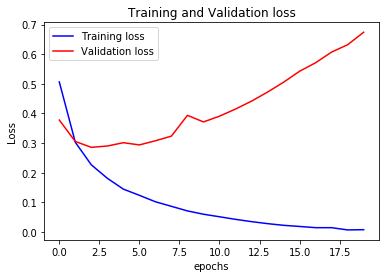

In [11]:
# matplotlib을 이용한 결과 그래프 출력 - Loss

import matplotlib.pyplot as plt

loss = history_dict['loss']
val_loss = history_dict['val_loss']

plt.plot(loss, 'b', label='Training loss') # 'b' = blue
plt.plot(val_loss, 'r', label='Validation loss') # 'r' = red
plt.title("Training and Validation loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(loc='best')

plt.show()

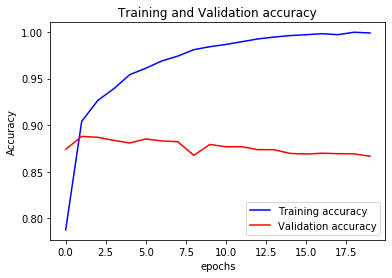

In [12]:
# matplotlib을 이용한 결과 그래프 출력 - Accuracy

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(acc, 'b', label='Training accuracy') # 'b' = blue
plt.plot(val_acc, 'r', label='Validation accuracy') # 'r' = red
plt.title("Training and Validation accuracy")
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(loc='best')

plt.show()

결과
- training loss가 epoch마다 잘 감소함
- training accuracy가 epoch마다 잘 증가함
- validation loss가 감소하다가 약 5번째 epoch부터 증가함
- validation accuracy가 약 5번째 epoch부터 증가하다가 약간 감소함

***위와 같은 결과를 훈련 데이터에 overfitting(과대적합)되었다고 함***

In [13]:
# overfitting 방지 기법은 4장에서 다룸
# 여기서는 다시 5epoch까지만 학습시켜서 결과를 출력해봄

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=5,
          batch_size=512,
          validation_data=(x_val, y_val))

# test dataset에 평가

results = model.evaluate(x_test, y_test)
print("test_loss, test_accuracy :", results)

Train on 15000 samples, validate on 10000 samples
Epoch 1/5
15000/15000 [==============================] - 1s 51us/step - loss: 0.4897 - accuracy: 0.7801 - val_loss: 0.3713 - val_accuracy: 0.8583
Epoch 2/5
15000/15000 [==============================] - 1s 46us/step - loss: 0.2801 - accuracy: 0.9072 - val_loss: 0.2945 - val_accuracy: 0.8892
Epoch 3/5
15000/15000 [==============================] - 1s 46us/step - loss: 0.2101 - accuracy: 0.9317 - val_loss: 0.2845 - val_accuracy: 0.8856
Epoch 4/5
15000/15000 [==============================] - 1s 46us/step - loss: 0.1653 - accuracy: 0.9437 - val_loss: 0.2781 - val_accuracy: 0.8886
Epoch 5/5
25000/25000 [==============================] - 1s 33us/step
test_loss, test_accuracy : [0.3071655643367767, 0.8776000142097473]


## 3.4.5 훈련된 모델로 새로운 데이터에 대해 예측하기

predict()를 통해 실제 데이터에 대한 확률을 예측할 수 있음

In [14]:
print(model.predict(x_test))

[[0.14562833]
 [0.9996629 ]
 [0.91559756]
 ...
 [0.09386003]
 [0.09343845]
 [0.45604497]]


### 3.4.6 정리

- 원본 데이터를 신경망에 주입하기 위해서는 꽤 많은 전처리가 필요하다. (단어 시퀀스는 이진 벡터로 인코딩 될 수 있으며 다른 방식도 있음)
- 이진 분류 문제의 네트워크에서는 마지막 층이 하나의 유닛과 sigmoid 활성화 함수를 가진 Dense층
- 이진 분류 문제의 손실함수는 binary_crossentropy
- rmsprop 옵티마이저는 문제에 상관없이 일반적으로 잘 동작함